In [117]:
import numpy as np
def generador_congruencia_lineal_enteros(n, x0, a=1664525, c=1013904223, M=2**32):
    numeros_a = [] 
    for i in range(n): 
        i = i + 1 
        x_a = (c + a*x0) %M 
        if x_a == 10: 
            print(i,x_a) 
        numeros_a.append(x_a) 
        x0 = x_a 
    return(numeros_a) 
def generador_alta_calidad(n, x0, a=1664525, c=1013904223, M=2**32):
    return np.array(generador_congruencia_lineal_enteros(n,x0,a,c,M))/M

In [118]:
def generador_fibonacci_enteros(n, x0, j=24, k=55, m=2**32):
    numeros = generador_congruencia_lineal_enteros(k, x0) #Con esto genero de 0 hasta (k-1). Me devuelve lista con k-1 elementos.
    for i in range(k, k + n): #Esto va de k hasta k+(n-1) pues python comienza a contar desde cero.
        numeros.append((numeros[i-j] + numeros[i-k]) % m)  #Resultado pseudoaletorio, este numero estara entre 0 y (2**32 - 1)
    return numeros[k:] #Notar que pido los numeros de k en adelante, es decir quiero n y por lo tanto me deshago de los k de congruencia lineal.

def generador_fibonacci(n, x0, j=24, k=55, m=2**32):
    return np.array(generador_fibonacci_enteros(n,x0,j,k,m))/m

In [121]:
##Inciso e
numeros_generados = generador_fibonacci(10000, 10)
print(numeros_generados)

[0.81331834 0.18956738 0.10739011 ... 0.83843474 0.28266436 0.80137245]


In [122]:
##Inciso f 1
media_muestral = np.mean(numeros_generados)
varianza_muestral = np.var(numeros_generados)
media_teorica = 0.5
varianza_teorica = 1/12
print("--- Comparación de Estadísticas ---")
print(f"Media Muestral:   {media_muestral:.6f}")
print(f"Media Teórica:    {media_teorica:.6f}")
print("-" * 35)
print(f"Varianza Muestral: {varianza_muestral:.6f}")
print(f"Varianza Teórica:  {varianza_teorica:.6f}")

--- Comparación de Estadísticas ---
Media Muestral:   0.499854
Media Teórica:    0.500000
-----------------------------------
Varianza Muestral: 0.083337
Varianza Teórica:  0.083333


[1030549473, 797165516, 2863095995, 163339998, 209336485, 424841664, 2809322015, 3442696434, 2555202473, 671228148, 1434441667, 2515507782, 1642573037, 1732127080, 1245609383, 754638554, 1027678321, 1991483164, 1588539339, 2201109166, 1871424053, 730117648, 440832559, 4141488578, 800558649, 2935808580, 4195453139, 1215428630, 2369212541, 1317328824, 941176759, 2462626218, 17020161, 1893108332, 4144431835, 3662699134, 752861125, 1685139040, 4127755839, 129123986, 2363274441, 4216141716, 821280227, 1638074854, 522065933, 667965960, 279623111, 3656808570, 1172155793, 251759036, 264231403, 3253970510, 1739553109, 1140652720, 4149857871]


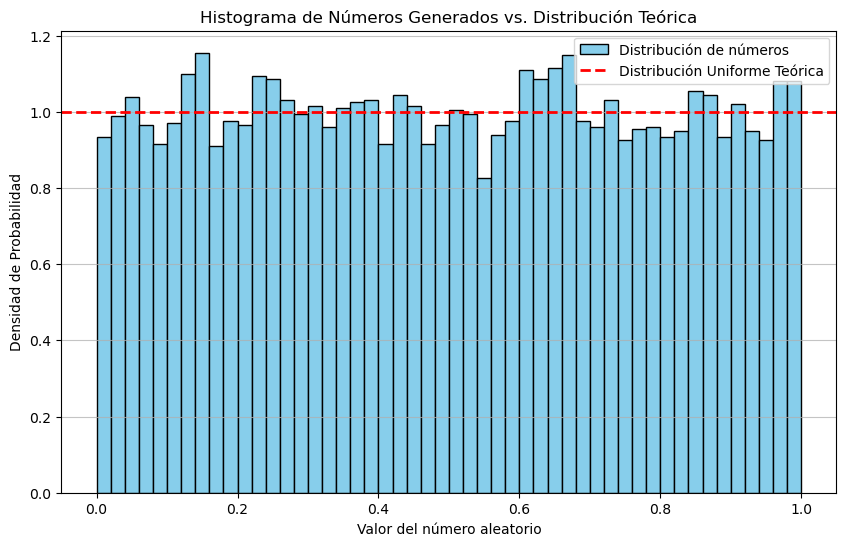

In [115]:
##Inciso f 2
import matplotlib.pyplot as plt
numeros_generados = generador_fibonacci(10000, 10)
plt.figure(figsize=(10, 6))
plt.hist(numeros_generados, bins=50, density=True, label='Distribución de números', color='skyblue', edgecolor='black')
# Añadimos una línea horizontal roja para representar la distribución uniforme teórica.
# La altura de esta línea es 1 en el intervalo [0, 1].
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label='Distribución Uniforme Teórica')
plt.title('Histograma de Números Generados vs. Distribución Teórica')
plt.xlabel('Valor del número aleatorio')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


--- Análisis del Generador de NumPy ---
Media de NumPy:    0.506434
Varianza de NumPy: 0.083421
(Media Teórica:   0.500000, Varianza Teórica: 0.083333)

Generando histograma para los números de NumPy...


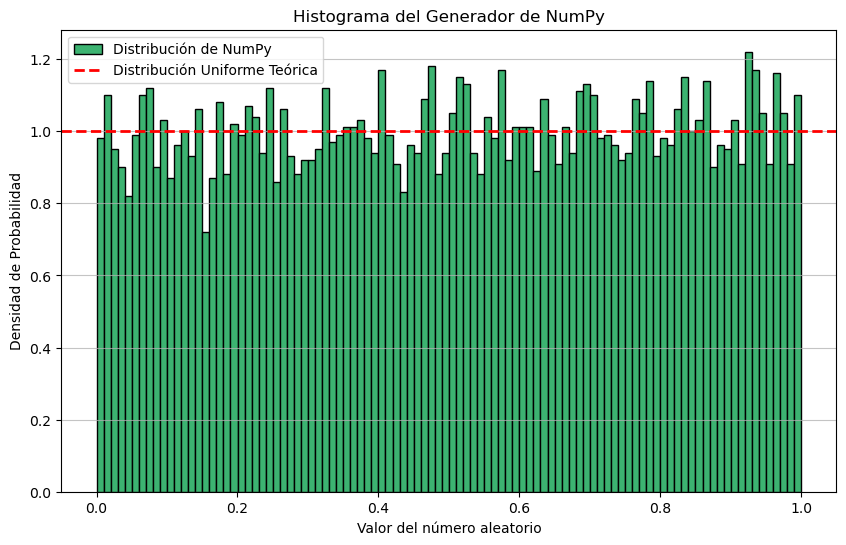

In [110]:

numeros_numpy = np.random.random(10000)
media_numpy = np.mean(numeros_numpy)
varianza_numpy = np.var(numeros_numpy)

media_teorica = 0.5
varianza_teorica = 1/12

print("--- Análisis del Generador de NumPy ---")
print(f"Media de NumPy:    {media_numpy:.6f}")
print(f"Varianza de NumPy: {varianza_numpy:.6f}")
print(f"(Media Teórica:   {media_teorica:.6f}, Varianza Teórica: {varianza_teorica:.6f})")


print("\nGenerando histograma para los números de NumPy...")
plt.figure(figsize=(10, 6))

plt.hist(numeros_numpy, bins=100, density=True, label='Distribución de NumPy', color='mediumseagreen', edgecolor='black')
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label='Distribución Uniforme Teórica')

plt.title('Histograma del Generador de NumPy')
plt.xlabel('Valor del número aleatorio')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()